In [2]:
!pip install --upgrade sklearn
!pip install --upgrade scikit-learn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import pandas as pd
import numpy as np

In [4]:
match = pd.read_csv('match_data.csv')
match_info = pd.read_csv('match_info_data.csv')

In [5]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6534 entries, 0 to 6533
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                6534 non-null   int64  
 1   season                  6534 non-null   int64  
 2   start_date              6534 non-null   object 
 3   venue                   6534 non-null   object 
 4   innings                 6534 non-null   int64  
 5   ball                    6534 non-null   float64
 6   batting_team            6534 non-null   object 
 7   bowling_team            6534 non-null   object 
 8   striker                 6534 non-null   object 
 9   non_striker             6534 non-null   object 
 10  bowler                  6533 non-null   object 
 11  runs_off_bat            6533 non-null   float64
 12  extras                  6533 non-null   float64
 13  wides                   235 non-null    float64
 14  noballs                 40 non-null     

In [6]:
match['total_runs'] = match.iloc[:, 11:18].sum(axis=1, skipna=True)

In [7]:
match_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1024 non-null   int64 
 1   season           1024 non-null   object
 2   city             973 non-null    object
 3   date             1024 non-null   object
 4   team1            1024 non-null   object
 5   team2            1024 non-null   object
 6   toss_winner      1024 non-null   object
 7   toss_decision    1024 non-null   object
 8   result           1024 non-null   object
 9   dl_applied       1024 non-null   int64 
 10  winner           1005 non-null   object
 11  win_by_runs      1024 non-null   int64 
 12  win_by_wickets   1024 non-null   int64 
 13  player_of_match  1019 non-null   object
 14  venue            1024 non-null   object
 15  umpire1          1024 non-null   object
 16  umpire2          1024 non-null   object
 17  umpire3          1021 non-null   

In [8]:
total_score_df = match.groupby(['match_id','innings']).sum()['total_runs'].reset_index()

<ipython-input-8-215ede885464>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = match.groupby(['match_id','innings']).sum()['total_runs'].reset_index()


In [9]:
total_score_df = total_score_df[total_score_df['innings'] == 1]

In [10]:
match_df = match_info.merge(total_score_df[['match_id','total_runs']], left_on='id', right_on='match_id')

In [11]:
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,1370353,218.0
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal,1370352,243.0
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney,1370351,198.0
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford,1370350,177.0
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit,1359543,212.0
5,1359544,2023,Bengaluru,2023/05/21,Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,normal,0,Gujarat Titans,0,6,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru",Nitin Menon,VK Sharma,Tapan Sharma,1359544,204.0
6,1359542,2023,Kolkata,2023/05/20,Lucknow Super Giants,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Lucknow Super Giants,1,0,N Pooran,"Eden Gardens, Kolkata",J Madanagopal,UV Gandhe,YC Barde,1359542,188.0
7,1359541,2023,Delhi,2023/05/20,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,77,0,RD Gaikwad,"Arun Jaitley Stadium, Delhi",CB Gaffaney,NA Patwardhan,AK Chaudhary,1359541,233.0
8,1359540,2023,Dharamsala,2023/05/19,Punjab Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,D Padikkal,"Himachal Pradesh Cricket Association Stadium, ...",A Nand Kishore,RJ Tucker,Navdeep Singh,1359540,193.0
9,1359539,2023,Hyderabad,2023/05/18,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,V Kohli,"Rajiv Gandhi International Stadium, Uppal, Hyd...",BNJ Oxenford,VK Sharma,HAS Khalid,1359539,192.0


In [12]:
match_df['team1'].unique()

array(['Gujarat Titans', 'Mumbai Indians', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Lucknow Super Giants', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals'], dtype=object)

In [13]:
teams = ['Gujarat Titans',
         'Mumbai Indians',
         'Chennai Super Kings',
         'Sunrisers Hyderabad',
         'Royal Challengers Bangalore',
         'Lucknow Super Giants',
         'Delhi Capitals',
         'Kolkata Knight Riders',
         'Rajasthan Royals',
         'Kings XI Punjab']

In [14]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Pinjab kings', 'Kings XI Punjab')
match_df['team2'] = match_df['team2'].str.replace('Pinjab kings', 'Kings XI Punjab')

In [15]:
match_df['team1'].unique()

array(['Gujarat Titans', 'Mumbai Indians', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Lucknow Super Giants', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals'], dtype=object)

In [16]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [17]:
match_df['team1'].unique()

array(['Gujarat Titans', 'Mumbai Indians', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Rajasthan Royals'], dtype=object)

In [18]:
match_df = match_df[match_df['dl_applied']==0]

In [19]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal,1370352,243.0
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney,1370351,198.0
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford,1370350,177.0
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit,1359543,212.0
5,1359544,2023,Bengaluru,2023/05/21,Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,normal,0,Gujarat Titans,0,6,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru",Nitin Menon,VK Sharma,Tapan Sharma,1359544,204.0


In [20]:
match_df  = match_df[['match_id','city','winner','total_runs']]

In [21]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6534 entries, 0 to 6533
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                6534 non-null   int64  
 1   season                  6534 non-null   int64  
 2   start_date              6534 non-null   object 
 3   venue                   6534 non-null   object 
 4   innings                 6534 non-null   int64  
 5   ball                    6534 non-null   float64
 6   batting_team            6534 non-null   object 
 7   bowling_team            6534 non-null   object 
 8   striker                 6534 non-null   object 
 9   non_striker             6534 non-null   object 
 10  bowler                  6533 non-null   object 
 11  runs_off_bat            6533 non-null   float64
 12  extras                  6533 non-null   float64
 13  wides                   235 non-null    float64
 14  noballs                 40 non-null     

In [22]:
match['wides'].fillna(0, inplace=True)
match['noballs'].fillna(0, inplace=True)

In [23]:
pd.set_option('display.max_columns', None)

In [24]:
match.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,total_runs
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,DL Chahar,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0,0.0
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,DL Chahar,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0,0.0
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,DL Chahar,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0,1.0
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,DL Chahar,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0,1.0
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,DL Chahar,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0,1.0


In [25]:

match['overs'] = match['ball'].apply(lambda x: int(x) + 1 if x % 1 != 0 else int(x))


In [26]:
match.tail(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,total_runs,overs
6524,1359521,2023,2023-05-04,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,11.4,Kolkata Knight Riders,Sunrisers Hyderabad,AD Russell,RK Singh,AK Markram,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1359521.0,0.0,12
6525,1359521,2023,2023-05-04,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,11.5,Kolkata Knight Riders,Sunrisers Hyderabad,AD Russell,RK Singh,AK Markram,6.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1359521.0,6.0,12
6526,1359521,2023,2023-05-04,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,11.6,Kolkata Knight Riders,Sunrisers Hyderabad,AD Russell,RK Singh,AK Markram,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1359521.0,1.0,12
6527,1359521,2023,2023-05-04,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,12.1,Kolkata Knight Riders,Sunrisers Hyderabad,AD Russell,RK Singh,M Markande,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1359521.0,0.0,13
6528,1359521,2023,2023-05-04,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,12.2,Kolkata Knight Riders,Sunrisers Hyderabad,AD Russell,RK Singh,M Markande,6.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1359521.0,6.0,13
6529,1359521,2023,2023-05-04,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,12.3,Kolkata Knight Riders,Sunrisers Hyderabad,AD Russell,RK Singh,M Markande,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1359521.0,0.0,13
6530,1359521,2023,2023-05-04,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,12.4,Kolkata Knight Riders,Sunrisers Hyderabad,AD Russell,RK Singh,M Markande,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1359521.0,1.0,13
6531,1359521,2023,2023-05-04,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,12.5,Kolkata Knight Riders,Sunrisers Hyderabad,RK Singh,AD Russell,M Markande,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1359521.0,0.0,13
6532,1359521,2023,2023-05-04,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,12.6,Kolkata Knight Riders,Sunrisers Hyderabad,RK Singh,AD Russell,M Markande,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1359521.0,4.0,13
6533,1359521,2023,2023-05-04,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,13.1,Kolkata Knight Riders,Sunrisers Hyderabad,AD Russell,RK Si,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14


In [27]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6534 entries, 0 to 6533
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                6534 non-null   int64  
 1   season                  6534 non-null   int64  
 2   start_date              6534 non-null   object 
 3   venue                   6534 non-null   object 
 4   innings                 6534 non-null   int64  
 5   ball                    6534 non-null   float64
 6   batting_team            6534 non-null   object 
 7   bowling_team            6534 non-null   object 
 8   striker                 6534 non-null   object 
 9   non_striker             6534 non-null   object 
 10  bowler                  6533 non-null   object 
 11  runs_off_bat            6533 non-null   float64
 12  extras                  6533 non-null   float64
 13  wides                   6534 non-null   float64
 14  noballs                 6534 non-null   

In [28]:
delivery_df = match_df.merge(match, on="match_id")

In [29]:
delivery_df = delivery_df[delivery_df['innings']==2]

In [30]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 127 to 5234
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                2499 non-null   int64  
 1   city                    2499 non-null   object 
 2   winner                  2499 non-null   object 
 3   total_runs_x            2499 non-null   float64
 4   season                  2499 non-null   int64  
 5   start_date              2499 non-null   object 
 6   venue                   2499 non-null   object 
 7   innings                 2499 non-null   int64  
 8   ball                    2499 non-null   float64
 9   batting_team            2499 non-null   object 
 10  bowling_team            2499 non-null   object 
 11  striker                 2499 non-null   object 
 12  non_striker             2499 non-null   object 
 13  bowler                  2499 non-null   object 
 14  runs_off_bat            2499 non-null 

In [31]:
delivery_df['extras'].fillna(0, inplace=True)
delivery_df['byes'].fillna(0, inplace=True)
delivery_df['legbyes'].fillna(0, inplace=True)
delivery_df['penalty'].fillna(0, inplace=True)

<ipython-input-31-97b5c77bd316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['extras'].fillna(0, inplace=True)
<ipython-input-31-97b5c77bd316>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['byes'].fillna(0, inplace=True)
<ipython-input-31-97b5c77bd316>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['legbyes'].fillna(0, inplace=True)
<ipython-input-31-97b5c77bd316>:4: SettingWithCopyWarning: 

In [32]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-32-cafdf4636499>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
<ipython-input-32-cafdf4636499>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [33]:
delivery_df[delivery_df.wides==1]

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,total_runs_y,overs,current_score
136,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,1.4,Mumbai Indians,Gujarat Titans,C Green,RG Sharma,HH Pandya,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1370352.0,2.0,2,18.0
188,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,10.1,Mumbai Indians,Gujarat Titans,SA Yadav,C Green,Noor Ahmad,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1370352.0,2.0,11,113.0
208,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,13.1,Mumbai Indians,Gujarat Titans,Vishnu Vinod,SA Yadav,J Little,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1370352.0,2.0,14,139.0
225,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,15.5,Mumbai Indians,Gujarat Titans,CJ Jordan,PP Chawla,Rashid Khan,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1370352.0,2.0,16,166.0
402,1370351,Chennai,Mumbai Indians,198.0,2023,2023-05-24,"MA Chidambaram Stadium, Chepauk, Chennai",2,5.5,Lucknow Super Giants,Mumbai Indians,MP Stoinis,KH Pandya,HR Shokeen,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1370351.0,2.0,6,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4553,1359526,Jaipur,Sunrisers Hyderabad,225.0,2023,2023-05-07,"Sawai Mansingh Stadium, Jaipur",2,16.2,Sunrisers Hyderabad,Rajasthan Royals,RA Tripathi,AK Markram,OC McCoy,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1359526.0,2.0,17,164.0
4730,1359524,Delhi,Delhi Capitals,189.0,2023,2023-05-06,"Arun Jaitley Stadium, Delhi",2,4.4,Delhi Capitals,Royal Challengers Bangalore,PD Salt,DA Warner,Mohammed Siraj,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1359524.0,2.0,5,61.0
4780,1359524,Delhi,Delhi Capitals,189.0,2023,2023-05-06,"Arun Jaitley Stadium, Delhi",2,12.5,Delhi Capitals,Royal Challengers Bangalore,RR Rossouw,PD Salt,HV Patel,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1359524.0,2.0,13,148.0
4933,1359523,Chennai,Chennai Super Kings,147.0,2023,2023-05-06,"MA Chidambaram Stadium, Chepauk, Chennai",2,0.6,Chennai Super Kings,Mumbai Indians,RD Gaikwad,DP Conway,C Green,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1359523.0,2.0,1,8.0


In [34]:
delivery_df['target_runs'] = delivery_df['total_runs_x']+1

<ipython-input-34-64073ce60c11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['target_runs'] = delivery_df['total_runs_x']+1


In [35]:
delivery_df['runs_left'] = delivery_df['target_runs']-delivery_df['current_score']

<ipython-input-35-5113044e2965>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['target_runs']-delivery_df['current_score']


In [36]:
delivery_df['ball'] = delivery_df['ball'].apply(lambda x: int(str(x).split(".")[1]))

<ipython-input-36-0d2f7a7d6ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['ball'] = delivery_df['ball'].apply(lambda x: int(str(x).split(".")[1]))


In [37]:
delivery_df

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,total_runs_y,overs,current_score,target_runs,runs_left
127,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,1,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1370352.0,0.0,1,0.0,244.0,244.0
128,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,2,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1370352.0,1.0,1,1.0,244.0,243.0
129,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,3,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1370352.0,0.0,1,1.0,244.0,243.0
130,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,4,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1370352.0,4.0,1,5.0,244.0,239.0
131,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,5,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,caught,N Wadhera,NaN,NaN,1370352.0,0.0,1,5.0,244.0,239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,1359522,Jaipur,Gujarat Titans,126.0,2023,2023-05-05,"Sawai Mansingh Stadium, Jaipur",2,1,Gujarat Titans,Rajasthan Royals,WP Saha,HH Pandya,YS Chahal,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1359522.0,1.0,14,118.0,127.0,9.0
5231,1359522,Jaipur,Gujarat Titans,126.0,2023,2023-05-05,"Sawai Mansingh Stadium, Jaipur",2,2,Gujarat Titans,Rajasthan Royals,HH Pandya,WP Saha,YS Chahal,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1359522.0,1.0,14,119.0,127.0,8.0
5232,1359522,Jaipur,Gujarat Titans,126.0,2023,2023-05-05,"Sawai Mansingh Stadium, Jaipur",2,3,Gujarat Titans,Rajasthan Royals,WP Saha,HH Pandya,YS Chahal,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1359522.0,1.0,14,120.0,127.0,7.0
5233,1359522,Jaipur,Gujarat Titans,126.0,2023,2023-05-05,"Sawai Mansingh Stadium, Jaipur",2,4,Gujarat Titans,Rajasthan Royals,HH Pandya,WP Saha,YS Chahal,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1359522.0,1.0,14,121.0,127.0,6.0


In [38]:
delivery_df['balls_left'] = 126 - (delivery_df['overs'] * 6 + delivery_df['ball']).mask((delivery_df['wides'] > 0) | (delivery_df['noballs'] > 0)).ffill()

In [39]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

In [40]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")

In [41]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [42]:
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values

<ipython-input-42-221b31ac7b3e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


In [43]:
delivery_df['wickets'] = 10 - wickets

In [44]:
delivery_df.head(10)

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,total_runs_y,overs,current_score,target_runs,runs_left,balls_left,wickets
127,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,1,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1370352.0,0.0,1,0.0,244.0,244.0,119.0,10
128,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,2,Mumbai Indians,Gujarat Titans,RG Sharma,N Wadhera,Mohammed Shami,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1370352.0,1.0,1,1.0,244.0,243.0,118.0,10
129,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,3,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1370352.0,0.0,1,1.0,244.0,243.0,117.0,10
130,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,4,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1370352.0,4.0,1,5.0,244.0,239.0,116.0,10
131,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,5,Mumbai Indians,Gujarat Titans,N Wadhera,RG Sharma,Mohammed Shami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,caught,1,NaN,NaN,1370352.0,0.0,1,5.0,244.0,239.0,115.0,9
132,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,6,Mumbai Indians,Gujarat Titans,C Green,RG Sharma,Mohammed Shami,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1370352.0,4.0,1,9.0,244.0,235.0,114.0,9
133,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,1,Mumbai Indians,Gujarat Titans,RG Sharma,C Green,HH Pandya,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1370352.0,4.0,2,13.0,244.0,231.0,113.0,9
134,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,2,Mumbai Indians,Gujarat Titans,RG Sharma,C Green,HH Pandya,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1370352.0,2.0,2,15.0,244.0,229.0,112.0,9
135,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,3,Mumbai Indians,Gujarat Titans,RG Sharma,C Green,HH Pandya,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1370352.0,1.0,2,16.0,244.0,228.0,111.0,9
136,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,4,Mumbai Indians,Gujarat Titans,C Green,RG Sharma,HH Pandya,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1370352.0,2.0,2,18.0,244.0,226.0,111.0,9


In [45]:
# CRR
delivery_df['crr'] = (delivery_df.current_score*6)/(120 - delivery_df.balls_left)

In [46]:
delivery_df['rrr'] = (delivery_df.runs_left*6)/(delivery_df.balls_left)

In [47]:
delivery_df.sample(20)

,match_id,city,winner,total_runs_x,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,total_runs_y,overs,current_score,target_runs,runs_left,balls_left,wickets,crr,rrr
3120,1359532,Hyderabad,Lucknow Super Giants,187.0,2023,2023-05-13,"Rajiv Gandhi International Stadium, Uppal, Hyd...",2,6,Lucknow Super Giants,Sunrisers Hyderabad,MP Stoinis,PN Mankad,B Kumar,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1359532.0,1.0,15,119.0,188.0,69.0,30.0,8,7.933333,13.800000
2829,1359535,Chennai,Kolkata Knight Riders,150.0,2023,2023-05-14,"MA Chidambaram Stadium, Chepauk, Chennai",2,5,Kolkata Knight Riders,Chennai Super Kings,N Rana,RK Singh,MM Ali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1359535.0,0.0,7,51.0,151.0,100.0,79.0,7,7.463415,7.594937
2373,1359536,Ahmedabad,Gujarat Titans,201.0,2023,2023-05-15,"Narendra Modi Stadium, Ahmedabad",2,2,Sunrisers Hyderabad,Gujarat Titans,AK Markram,H Klaasen,Mohammed Shami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,caught,1,NaN,NaN,1359536.0,0.0,5,30.0,202.0,172.0,94.0,6,6.923077,10.978723
385,1370351,Chennai,Mumbai Indians,198.0,2023,2023-05-24,"MA Chidambaram Stadium, Chepauk, Chennai",2,6,Lucknow Super Giants,Mumbai Indians,KR Mayers,KH Pandya,JP Behrendorff,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1370351.0,1.0,3,23.0,199.0,176.0,102.0,9,7.666667,10.352941
2609,1359534,Jaipur,Royal Challengers Bangalore,176.0,2023,2023-05-14,"Sawai Mansingh Stadium, Jaipur",2,7,Rajasthan Royals,Royal Challengers Bangalore,D Padikkal,JE Root,WD Parnell,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1359534.0,4.0,2,13.0,177.0,164.0,107.0,7,6.000000,9.196262
2192,1359537,Lucknow,Lucknow Super Giants,187.0,2023,2023-05-16,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,2,3,Mumbai Indians,Lucknow Super Giants,TH David,Vishnu Vinod,Mohsin Khan (2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1359537.0,0.0,17,137.0,188.0,51.0,21.0,6,8.303030,14.571429
1384,1359542,Kolkata,Lucknow Super Giants,188.0,2023,2023-05-20,"Eden Gardens, Kolkata",2,4,Kolkata Knight Riders,Lucknow Super Giants,N Rana,JJ Roy,K Gowtham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1359542.0,0.0,8,74.0,189.0,115.0,74.0,9,9.652174,9.324324
3591,1359530,Kolkata,Rajasthan Royals,152.0,2023,2023-05-11,"Eden Gardens, Kolkata",2,5,Rajasthan Royals,Kolkata Knight Riders,YBK Jaiswal,SV Samson,Suyash Sharma,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1359530.0,1.0,13,152.0,153.0,1.0,43.0,9,11.844156,0.139535
152,1370352,Ahmedabad,Gujarat Titans,243.0,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,1,Mumbai Indians,Gujarat Titans,Tilak Varma,SA Yadav,Mohammed Shami,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1370352.0,4.0,5,46.0,244.0,198.0,95.0,8,11.040000,12.505263
4296,1359525,Ahmedabad,Gujarat Titans,233.0,2023,2023-05-07,"Narendra Modi Stadium, Ahmedabad",2,6,Lucknow Super Giants,Gujarat Titans,N Pooran,Q de Kock,MM Sharma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,1359525.0,0.0,15,136.0,234.0,98.0,30.0,7,9.066667,19.600000


In [48]:
def result(row):
    return 1 if row['winner'] == row['batting_team'] else 0

In [49]:
delivery_df['result'] = delivery_df.apply(result, axis=1)

In [50]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [51]:
final_df.shape

(2499, 10)

In [52]:
final_df.sample(final_df.shape[0])

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
1847,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,185.0,115.0,10,192.0,9.600000,9.652174,1
3318,Gujarat Titans,Mumbai Indians,Mumbai,152.0,69.0,5,220.0,8.117647,13.217391,0
4770,Delhi Capitals,Royal Challengers Bangalore,Delhi,60.0,53.0,8,189.0,11.641791,6.792453,1
1423,Kolkata Knight Riders,Lucknow Super Giants,Kolkata,76.0,36.0,6,188.0,8.071429,12.666667,0
194,Mumbai Indians,Gujarat Titans,Ahmedabad,119.0,53.0,7,243.0,11.194030,13.471698,0
...,...,...,...,...,...,...,...,...,...,...
3059,Lucknow Super Giants,Sunrisers Hyderabad,Hyderabad,162.0,88.0,9,187.0,4.875000,11.045455,1
695,Gujarat Titans,Chennai Super Kings,Chennai,53.0,24.0,4,177.0,7.812500,13.250000,0
5021,Chennai Super Kings,Mumbai Indians,Chennai,19.0,29.0,7,147.0,8.505495,3.931034,1
4704,Delhi Capitals,Royal Challengers Bangalore,Delhi,186.0,118.0,10,189.0,12.000000,9.457627,1


In [53]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
2657,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,115.0,60.0,2,176.0,6.2,11.5,0


In [54]:
final_df.dropna(inplace=True)

<ipython-input-54-3665e38311c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [55]:
final_df = final_df[final_df['balls_left'] !=0 ]

In [56]:
from sklearn.model_selection import train_test_split
X = final_df.drop('result', axis=1)
y = final_df.pop('result')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [87]:
X_test.bowling_team.unique()

array(['Mumbai Indians', 'Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Chennai Super Kings', 'Rajasthan Royals', 'Gujarat Titans'],
      dtype=object)

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False, drop="first"),['batting_team','bowling_team','city'])
], remainder='passthrough')

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import sklearn

In [60]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [61]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [62]:
y_pred = pipe.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9979919678714859

In [64]:
pipe.predict_proba(X_test)[100]

array([9.99996921e-01, 3.07885353e-06])

In [65]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [68]:
temp_df,target = match_progression(delivery_df, 1370351, pipe)
temp_df

Target- 198.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
373,1,9.0,0,92.7,7.3
379,2,2.0,1,99.0,1.0
385,3,11.0,0,97.9,2.1
391,4,7.0,1,99.4,0.6
397,5,8.0,0,99.1,0.9
403,6,19.0,0,97.0,3.0
410,7,12.0,0,94.5,5.5
417,8,3.0,0,94.7,5.3
423,9,10.0,1,98.1,1.9
429,10,1.0,2,99.9,0.1


Text(0.5, 1.0, 'Target-198.0')

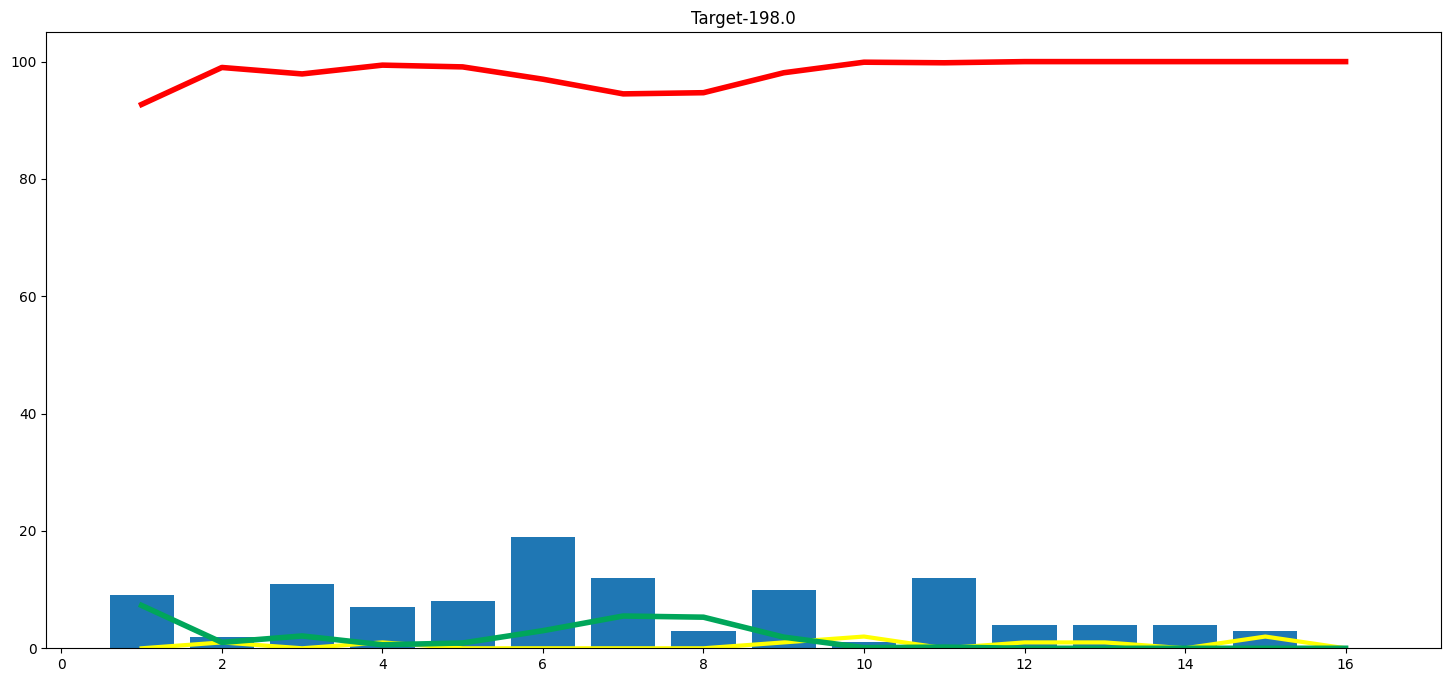

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [70]:
teams

['Gujarat Titans',
 'Mumbai Indians',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Royal Challengers Bangalore',
 'Lucknow Super Giants',
 'Delhi Capitals',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Kings XI Punjab']

In [71]:
delivery_df['city'].unique()

array(['Ahmedabad', 'Chennai', 'Mumbai', 'Bengaluru', 'Kolkata', 'Delhi',
       'Hyderabad', 'Lucknow', 'Jaipur'], dtype=object)

In [72]:
import pickle
pickle.dump(pipe, open('pipe.pkl','wb'))

In [73]:
pipe.predict_proba(final_df)

array([[9.99812095e-01, 1.87905191e-04],
       [9.99717656e-01, 2.82343696e-04],
       [9.99755240e-01, 2.44759979e-04],
       ...,
       [7.19907433e-06, 9.99992801e-01],
       [6.97534615e-06, 9.99993025e-01],
       [6.75864695e-06, 9.99993241e-01]])

In [74]:
!pip install --upgrade sklearn

  Using cached sklearn-0.0.post10.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [75]:
!pip install --upgrade scikit-learn


In [76]:
!pip show pickle

In [77]:
!pip install --upgrade scikit-learn


In [78]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
